In [1]:
!pip install -q timm kagglehub


In [2]:
!pip install -q timm kagglehub

import os
import torch
import timm
import random
import numpy as np
import kagglehub
from PIL import Image
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split


In [3]:
import os
import kagglehub
from PIL import Image

# Download the dataset
dataset_path = kagglehub.dataset_download("shreyansjain04/ai-vs-real-image-dataset")
print("📥 Dataset path:", dataset_path)

# Let's check the exact contents at each level
print("\nContents of dataset_path:")
for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        print(f"- Directory: {item}")
        # Print contents of first-level subdirectories
        for subitem in os.listdir(item_path):
            subitem_path = os.path.join(item_path, subitem)
            if os.path.isdir(subitem_path):
                print(f"  - Subdirectory: {subitem}")
                # Print a few examples of files in this directory
                files = os.listdir(subitem_path)[:5]  # Just the first 5 for brevity
                for file in files:
                    print(f"    - File: {file}")
            else:
                print(f"  - File: {subitem}")
    else:
        print(f"- File: {item}")

# Function to find image directories recursively
def find_image_directories(root, max_depth=3, current_depth=0):
    if current_depth > max_depth:
        return []
    
    image_dirs = []
    try:
        for item in os.listdir(root):
            item_path = os.path.join(root, item)
            if os.path.isdir(item_path):
                # Check if this directory contains images
                has_images = False
                for f in os.listdir(item_path)[:10]:  # Check first 10 files
                    if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
                        has_images = True
                        break
                
                if has_images:
                    image_dirs.append((item_path, item))
                
                # Recursively search subdirectories
                image_dirs.extend(find_image_directories(item_path, max_depth, current_depth + 1))
    except Exception as e:
        print(f"Error exploring {root}: {e}")
    
    return image_dirs

print("\nSearching for directories containing images...")
image_directories = find_image_directories(dataset_path)
print(f"Found {len(image_directories)} potential image directories:")
for dir_path, dir_name in image_directories:
    print(f"- {dir_path} (name: {dir_name})")

# Based on the search results, attempt to categorize and load images
def get_image_paths_and_labels(image_dirs):
    paths, labels = [], []
    
    # Determine labels based on directory names
    for dir_path, dir_name in image_dirs:
        # Try to determine if this is AI or Real based on directory name
        label = None
        if dir_name.lower() in ['ai', 'artificial', 'generated', 'fake']:
            label = 0  # AI
            print(f"Using directory '{dir_name}' as AI images (label 0)")
        elif dir_name.lower() in ['real', 'actual', 'true', 'human']:
            label = 1  # Real
            print(f"Using directory '{dir_name}' as Real images (label 1)")
        else:
            print(f"Couldn't determine if '{dir_name}' contains AI or Real images - skipping")
            continue
        
        # Process images in this directory
        for fname in os.listdir(dir_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
                path = os.path.join(dir_path, fname)
                try:
                    if os.path.isfile(path):
                        Image.open(path).verify()
                        paths.append(path)
                        labels.append(label)
                except Exception as e:
                    print(f"Error with image {path}: {e}")
                    continue
    
    return paths, labels

# Get image paths and labels
image_paths, image_labels = get_image_paths_and_labels(image_directories)
if image_paths:
    print(f"\n✅ {len(image_paths)} valid images found.")
    # Display distribution of labels
    ai_count = image_labels.count(0)
    real_count = image_labels.count(1)
    print(f"   - AI images: {ai_count}")
    print(f"   - Real images: {real_count}")
else:
    print("\n❌ No valid images found. The dataset structure might be different than expected.")
    
    # Last resort: Manual folder specification
    print("\nPlease try manually specifying the paths based on the directory listing above.")
    print("Example:")
    print("ai_folder = os.path.join(dataset_path, '[appropriate subfolder path]')")
    print("real_folder = os.path.join(dataset_path, '[appropriate subfolder path]')")

📥 Dataset path: /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-dataset/versions/1

Contents of dataset_path:
- Directory: ai
  - File: 100.jpg
  - File: 1000.jpg
  - File: 10000.jpg
  - File: 10001.jpg
  - File: 10003.jpg
  - File: 10004.jpg
  - File: 10005.jpg
  - File: 10006.jpg
  - File: 10007.jpg
  - File: 10008.jpg
  - File: 10009.jpg
  - File: 1001.jpg
  - File: 10010.jpg
  - File: 10011.jpg
  - File: 10012.jpg
  - File: 10013.jpg
  - File: 10014.jpg
  - File: 10015.jpg
  - File: 10017.jpg
  - File: 10018.jpg
  - File: 10019.jpg
  - File: 1002.jpg
  - File: 10020.jpg
  - File: 10021.jpg
  - File: 10022.jpg
  - File: 10023.jpg
  - File: 10024.jpg
  - File: 10025.jpg
  - File: 10026.jpg
  - File: 10027.jpg
  - File: 10028.jpg
  - File: 10029.jpg
  - File: 1003.jpg
  - File: 10030.jpg
  - File: 10031.jpg
  - File: 10032.jpg
  - File: 10033.jpg
  - File: 10034.jpg
  - File: 10035.jpg
  - File: 10036.jpg
  - File: 10037.jpg
  - File: 10038.jpg

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



✅ 60124 valid images found.
   - AI images: 34661
   - Real images: 25463


In [4]:
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, image_labels, test_size=0.2, random_state=42, stratify=image_labels
)


In [5]:
class AIVsRealDataset(Dataset):
    def __init__(self, paths, labels, augment=False):
        self.paths = paths
        self.labels = labels
        self.augment = augment
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandAugment() if augment else transforms.Lambda(lambda x: x),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),  # Normalize
        ])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        img = self.transform(img)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return img, label


In [6]:
BATCH_SIZE = 32

train_ds = AIVsRealDataset(train_paths, train_labels, augment=True)
val_ds = AIVsRealDataset(val_paths, val_labels, augment=False)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


In [7]:
class LeViTBinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = timm.create_model('levit_192', pretrained=True, num_classes=0)
        self.classifier = nn.Sequential(
            nn.Linear(384 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        feats = self.backbone.forward_features(x)
        feats_flat = feats.view(feats.size(0), -1)
        return self.classifier(feats_flat).squeeze(1)  # shape: [batch]


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeViTBinaryClassifier().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


Unexpected keys (head.bn.weight, head.bn.bias, head.bn.running_mean, head.bn.running_var, head.bn.num_batches_tracked, head_dist.bn.weight, head_dist.bn.bias, head_dist.bn.running_mean, head_dist.bn.running_var, head_dist.bn.num_batches_tracked) found while loading pretrained weights. This may be expected if model is being adapted.


In [9]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image, ImageFile

# This is crucial - it tells PIL to load truncated images anyway
ImageFile.LOAD_TRUNCATED_IMAGES = True

class AIvsRealDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        try:
            # Load and transform image
            img_path = self.image_paths[idx]
            image = Image.open(img_path).convert('RGB')
            
            if self.transform:
                image = self.transform(image)
                
            # Get label
            label = torch.tensor(self.labels[idx], dtype=torch.float32)
            
            return image, label
            
        except Exception as e:
            # If there's any error with this image, return a placeholder
            print(f"Error loading image {img_path}: {e}")
            # Create a small black image as a placeholder
            placeholder = torch.zeros((3, 224, 224)) if self.transform else Image.new('RGB', (224, 224), (0, 0, 0))
            # Use the same label
            label = torch.tensor(self.labels[idx], dtype=torch.float32)
            return placeholder, label

# Data loading function with robust error handling
def load_and_prepare_data(ai_folder, real_folder, val_split=0.2, batch_size=32):
    image_paths = []
    labels = []
    
    # Load AI images (label 0)
    if os.path.exists(ai_folder):
        for fname in os.listdir(ai_folder):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(ai_folder, fname))
                labels.append(0)  # AI = 0
    else:
        print(f"Warning: AI folder not found at {ai_folder}")
    
    # Load Real images (label 1)
    if os.path.exists(real_folder):
        for fname in os.listdir(real_folder):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(real_folder, fname))
                labels.append(1)  # Real = 1
    else:
        print(f"Warning: Real folder not found at {real_folder}")
    
    if not image_paths:
        raise ValueError("No images found in the specified directories")
    
    print(f"Found {len(image_paths)} images: {labels.count(0)} AI, {labels.count(1)} Real")
    
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Create full dataset
    dataset = AIvsRealDataset(image_paths, labels, transform)
    
    # Split into train and validation
    val_size = int(val_split * len(dataset))
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
    
    # Create data loaders with num_workers=0 for safety
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
    
    return train_loader, val_loader, train_dataset, val_dataset



In [13]:
import matplotlib.pyplot as plt

EPOCHS = 15
best_val_acc = 0

# Lists for plotting
train_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    total_loss, correct = 0, 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += ((torch.sigmoid(outputs) > 0.5) == labels.bool()).sum().item()

    acc = correct / len(train_ds)
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} | Train Acc: {acc*100:.2f}%, Loss: {avg_loss:.4f}")

    # Save for plotting
    train_losses.append(avg_loss)
    train_accuracies.append(acc)

    # Validation
    model.eval()
    val_correct = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            preds = torch.sigmoid(outputs) > 0.5
            val_correct += (preds == labels.bool()).sum().item()

    val_acc = val_correct / len(val_ds)
    val_accuracies.append(val_acc)

    print(f"🧪 Val Accuracy: {val_acc * 100:.2f}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        print("💾 Saved new best model!")


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1 | Train Acc: 79.31%, Loss: 0.4504


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 85.12%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 2 | Train Acc: 86.03%, Loss: 0.3257


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 88.17%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3 | Train Acc: 88.51%, Loss: 0.2655


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 86.30%


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 4 | Train Acc: 86.85%, Loss: 0.2982


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 89.63%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5 | Train Acc: 90.59%, Loss: 0.2257


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 90.57%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 6 | Train Acc: 91.07%, Loss: 0.2169


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 90.18%


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 7 | Train Acc: 92.54%, Loss: 0.1811


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 90.99%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 8 | Train Acc: 94.23%, Loss: 0.1452


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 91.15%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 9 | Train Acc: 94.91%, Loss: 0.1293


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 91.32%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 10 | Train Acc: 95.53%, Loss: 0.1139


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 92.12%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 11 | Train Acc: 96.25%, Loss: 0.0975


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 91.88%


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 12 | Train Acc: 96.73%, Loss: 0.0885


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 92.42%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 13 | Train Acc: 97.06%, Loss: 0.0803


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 92.60%
💾 Saved new best model!


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 14 | Train Acc: 97.24%, Loss: 0.0720


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 92.47%


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 15 | Train Acc: 97.86%, Loss: 0.0596


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


🧪 Val Accuracy: 92.86%
💾 Saved new best model!


In [10]:
model= LeViTBinaryClassifier()
model.load_state_dict(torch.load("best_model.pth"))


Unexpected keys (head.bn.weight, head.bn.bias, head.bn.running_mean, head.bn.running_var, head.bn.num_batches_tracked, head_dist.bn.weight, head_dist.bn.bias, head_dist.bn.running_mean, head_dist.bn.running_var, head_dist.bn.num_batches_tracked) found while loading pretrained weights. This may be expected if model is being adapted.


<All keys matched successfully>

In [11]:
pip install torchcam


Note: you may need to restart the kernel to use updated packages.


In [12]:
for name, module in model.named_modules():
    print(name)



backbone
backbone.stem
backbone.stem.conv1
backbone.stem.conv1.linear
backbone.stem.conv1.bn
backbone.stem.act1
backbone.stem.conv2
backbone.stem.conv2.linear
backbone.stem.conv2.bn
backbone.stem.act2
backbone.stem.conv3
backbone.stem.conv3.linear
backbone.stem.conv3.bn
backbone.stem.act3
backbone.stem.conv4
backbone.stem.conv4.linear
backbone.stem.conv4.bn
backbone.stages
backbone.stages.0
backbone.stages.0.downsample
backbone.stages.0.blocks
backbone.stages.0.blocks.0
backbone.stages.0.blocks.0.attn
backbone.stages.0.blocks.0.attn.qkv
backbone.stages.0.blocks.0.attn.qkv.linear
backbone.stages.0.blocks.0.attn.qkv.bn
backbone.stages.0.blocks.0.attn.proj
backbone.stages.0.blocks.0.attn.proj.act
backbone.stages.0.blocks.0.attn.proj.ln
backbone.stages.0.blocks.0.attn.proj.ln.linear
backbone.stages.0.blocks.0.attn.proj.ln.bn
backbone.stages.0.blocks.0.drop_path1
backbone.stages.0.blocks.0.mlp
backbone.stages.0.blocks.0.mlp.ln1
backbone.stages.0.blocks.0.mlp.ln1.linear
backbone.stages.0.bl

In [20]:
import os

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith((".jpg", ".jpeg", ".png")):
            print(os.path.join(root, file))
            break  # Remove this if you want to list all images


/teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-dataset/versions/1/ai/100.jpg
/teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-dataset/versions/1/real/1000.jpg


✅ Using target layer: Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/modules/module.py:1352: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


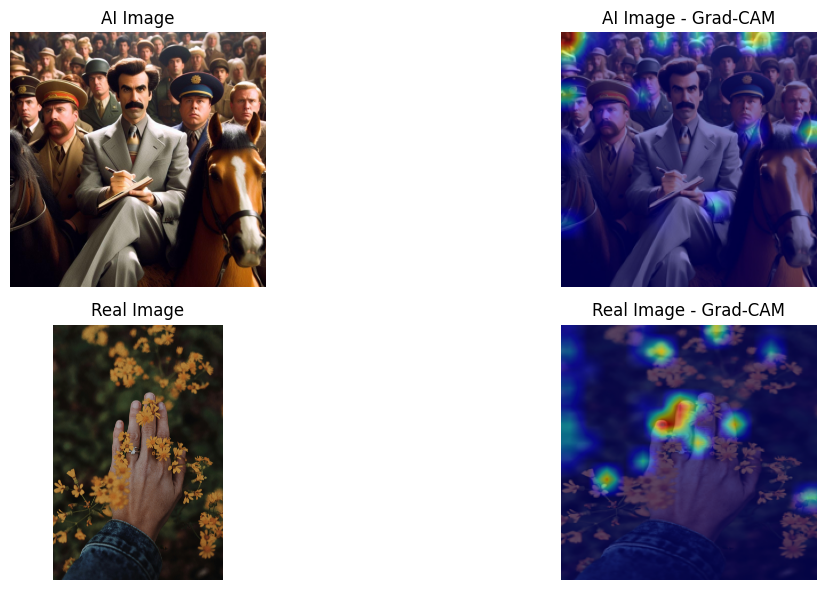

In [35]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
model.load_state_dict(torch.load("ai_vs_real_levit192_model.pth", map_location=device))
model.to(device)
model.eval()

# Automatically find the last Conv2d layer
target_layer = None
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        target_layer = module
print(f"✅ Using target layer: {target_layer}")

# Preprocessing transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

# Grad-CAM generation function
def generate_gradcam(model, image_tensor, target_layer, target_class=None):
    activations = []
    gradients = []

    def forward_hook(module, input, output):
        activations.append(output)

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    # Register hooks
    fwd_handle = target_layer.register_forward_hook(forward_hook)
    bwd_handle = target_layer.register_backward_hook(backward_hook)

    # Forward pass
    output = model(image_tensor)
    if target_class is None:
        prob = torch.sigmoid(output).item()
        target_class = 1 if prob > 0.5 else 0

    # Get score for the target class
    score = torch.sigmoid(output).squeeze()
    score = score if target_class == 1 else (1 - score)

    # Backward pass
    model.zero_grad()
    score.backward()

    # Remove hooks
    fwd_handle.remove()
    bwd_handle.remove()

    # Grad-CAM calculation
    grad = gradients[0].detach()
    act = activations[0].detach()
    weights = grad.mean(dim=(2, 3), keepdim=True)
    cam = (weights * act).sum(dim=1, keepdim=True)
    cam = F.relu(cam)
    cam = F.interpolate(cam, size=image_tensor.shape[2:], mode='bilinear', align_corners=False)

    cam -= cam.min()
    cam /= cam.max()
    return cam.squeeze().cpu().numpy()

# Overlay function
def overlay_cam_on_image(img, cam):
    img = np.array(img.resize((224, 224))) / 255.0
    heatmap = plt.cm.jet(cam)[..., :3]
    overlay = 0.5 * img + 0.5 * heatmap
    return np.clip(overlay, 0, 1)

# Load and preprocess images
def load_image(path):
    img = Image.open(path).convert("RGB")
    tensor = transform(img).unsqueeze(0).to(device)
    return img, tensor

# Image paths
ai_img_path = "/teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-dataset/versions/1/ai/100.jpg"
real_img_path = "/teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-dataset/versions/1/real/1000.jpg"

# Load and process both images
ai_img, ai_tensor = load_image(ai_img_path)
real_img, real_tensor = load_image(real_img_path)

# Generate Grad-CAMs
cam_ai = generate_gradcam(model, ai_tensor, target_layer)
cam_real = generate_gradcam(model, real_tensor, target_layer)

# Overlay Grad-CAMs
overlay_ai = overlay_cam_on_image(ai_img, cam_ai)
overlay_real = overlay_cam_on_image(real_img, cam_real)

# Plot side-by-side
plt.figure(figsize=(14, 6))

# AI Image
plt.subplot(2, 2, 1)
plt.imshow(ai_img)
plt.title("AI Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(overlay_ai)
plt.title("AI Image - Grad-CAM")
plt.axis("off")

# Real Image
plt.subplot(2, 2, 3)
plt.imshow(real_img)
plt.title("Real Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(overlay_real)
plt.title("Real Image - Grad-CAM")
plt.axis("off")

plt.tight_layout()
plt.show()


In [22]:
torch.save(model.state_dict(), "ai_vs_real_levit192_model.pth")
print("✅ Model saved as ai_vs_real_levit192_model.pth")


✅ Model saved as ai_vs_real_levit192_model.pth


In [28]:
import kagglehub

# Download latest version
path_test = kagglehub.dataset_download("shreyansjain04/ai-vs-real-image-test-dataset")

print("Path to dataset files:", path_test)

Path to dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-test-dataset/versions/2


In [29]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch


In [30]:
class AIVsRealTestDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        image = Image.open(path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        image_id = os.path.basename(path)
        return image, image_id


In [31]:
import os

print("Path to test dataset:", path_test)
print("Contents of downloaded test dataset:")

for root, dirs, files in os.walk(path_test):
    print(f"📁 {root}")
    for name in dirs:
        print(f"  📂 {name}")
    for name in files:
        print(f"  📄 {name}")


Path to test dataset: /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-test-dataset/versions/2
Contents of downloaded test dataset:
📁 /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-test-dataset/versions/2
  📂 teamspace
📁 /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-test-dataset/versions/2/teamspace
  📂 studios
📁 /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-test-dataset/versions/2/teamspace/studios
  📂 this_studio
📁 /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-test-dataset/versions/2/teamspace/studios/this_studio
  📂 attacked_images
📁 /teamspace/studios/this_studio/.cache/kagglehub/datasets/shreyansjain04/ai-vs-real-image-test-dataset/versions/2/teamspace/studios/this_studio/attacked_images
  📄 1.jpg
  📄 10.jpg
  📄 100.jpg
  📄 1000.jpg
  📄 1001.jpg
  📄 1002.jpg
  📄 1003.jpg
  

In [32]:
import os
from torchvision import transforms
from torch.utils.data import DataLoader

# Define the test image directory
test_image_dir = os.path.join(
    path_test, 
    "teamspace", 
    "studios", 
    "this_studio", 
    "attacked_images"
)

# Collect test image paths
test_image_paths = [
    os.path.join(test_image_dir, fname) 
    for fname in os.listdir(test_image_dir) 
    if fname.endswith(('.png', '.jpg', '.jpeg'))
]

# Define test transformations
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # same normalization as training
])

# Create test dataset and loader
test_ds = AIVsRealTestDataset(test_image_paths, transform=test_transform)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=2)


In [33]:
# Initialize the model
model = LeViTBinaryClassifier()

# Load the state dict (weights) into the model
model.load_state_dict(torch.load("ai_vs_real_levit192_model.pth"))

# Move the model to the appropriate device (e.g., GPU or CPU)
model = model.to(device)


Unexpected keys (head.bn.weight, head.bn.bias, head.bn.running_mean, head.bn.running_var, head.bn.num_batches_tracked, head_dist.bn.weight, head_dist.bn.bias, head_dist.bn.running_mean, head_dist.bn.running_var, head_dist.bn.num_batches_tracked) found while loading pretrained weights. This may be expected if model is being adapted.


In [34]:
import torch
import pandas as pd
import re
import time
# Load model weights and set to evaluation mode
model.load_state_dict(torch.load("best_model.pth"))
model.to(device)

model.eval()  # Ensure the model is in evaluation mode (this disables dropout, batchnorm updates, etc.)

# Disable gradients for inference
with torch.no_grad():
    all_preds = []
    all_ids = []
    start = time.time()
    # Iterate through the test dataset
    for images, image_ids in test_loader:
        images = images.to(device)  # Send images to the correct device

        # Ensure that the input images tensor doesn't require gradients
        images.requires_grad_(False)

        # Perform inference (forward pass)
        outputs = model(images)

        # Handle binary output (sigmoid)
        outputs = outputs.squeeze()  # Squeeze to remove extra dimensions
        preds = (outputs > 0.5).int().cpu().tolist()  # Apply threshold for binary classification

        # Store the predictions and image IDs
        all_preds.extend(preds)
        all_ids.extend(image_ids)
    end = time.time()

# Create submission DataFrame
submission_df = pd.DataFrame({
    "filename": all_ids,
    "class": all_preds
})

# Function to extract numeric part from filename
def extract_number(s):
    numbers = re.findall(r'\d+', s)
    return int(numbers[0]) if numbers else -1

# Sort by extracted number (from filenames)
submission_df["sort_key"] = submission_df["filename"].apply(extract_number)
submission_df = submission_df.sort_values(by="sort_key").drop(columns=["sort_key"])

# Save to CSV
submission_df.to_csv("submission.csv", index=False)

print("Submission file saved to submission.csv")
print(end-start)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (99991727 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Submission file saved to submission.csv
46.85708737373352
